# Sprint 8: Explorar las conexiones de datos con correlaciones


## 🥅 **Objetivo de la sesión**

1. Entender qué es una correlación y cómo interpretar su coeficiente.
2. Diferenciar correlación vs causalidad (spoiler: “juntos” no significa “culpable”).
3. Calcular una matriz de correlación para variables numéricas
4. Visualizar relaciones con:
   - Scatter plots
   - Heatmaps de correlación
   - Scatter matrix (pandas) y Pairplot (Seaborn)

## 🗂️ **Agenda de la sesión**

1. Teoría
2. Demostraciones
3. Ejercicio

---

### 1) ¿Qué es correlación?
Medida estadística que describe **qué tan asociadas** están dos variables.

- **Dirección**
  - `+` (positiva): si X sube, Y tiende a subir.
  - `-` (negativa): si X sube, Y tiende a bajar.
  - `0` ~ no relación lineal (ojo: puede existir relación no lineal).

- **Fuerza**
  - Se interpreta por el valor absoluto `|r|`.
  - Guía típica (depende del contexto):
    - 0.00–0.19: muy débil
    - 0.20–0.39: débil
    - 0.40–0.59: moderada
    - 0.60–0.79: fuerte
    - 0.80–1.00: muy fuerte

### 2) ¿Qué es correlacion lineal?
Relación que puede aproximarse con una línea recta: `Y ≈ a + bX` (Regresión lineal).
- **Pearson** mide principalmente relaciones **lineales**.
- **Spearman/Kendall** detectan relaciones **monótonas** (sube-sube o sube-baja, aunque no sea lineal).

### 3) Interpretación del coeficiente (Pearson r)
- `r = 1`: relación lineal positiva perfecta
- `r = -1`: relación lineal negativa perfecta
- `r = 0`: no relación lineal (pero puede haber relación curva)

![](https://www.probabilidadyestadistica.net/wp-content/uploads/2022/02/tipos-correlacion-1024x658.png)

⚠️ Correlación:
- NO implica causalidad
- Se afecta por outliers
- Puede cambiar si mezclas grupos (paradoja de Simpson)
- Depende del rango de los datos (si recortas rango, r puede bajar)

### 4) Correlación vs Causalidad
- **Correlación:** “se mueven juntos”
- **Causalidad:** “uno provoca al otro”

![](https://thumbs.dreamstime.com/z/diagrama-de-esquema-relaci%C3%B3n-correlaci%C3%B3n-con-causalidad-y-an%C3%A1lisis-diferencias-explicaci%C3%B3n-educativa-etiquetado-ejemplo-238117532.jpg)

Ejemplo clásico: ventas de helado y ahogamientos están correlacionados… el “culpable” suele ser **el verano** (variable de confusión).

### 5) Correlación según tipo de variables

#### A) Numérica vs Numérica
- **Pearson**: lineal, sensible a outliers, asume (aprox.) normalidad para inferencias.
- **Spearman**: por ranking, robusta a no-linealidad monótona.

#### B) Categórica vs Categórica
- **Chi-cuadrado** (χ²): prueba de asociación.
- **Cramér’s V** (0 a 1): intensidad de asociación (ideal para nominales).

#### C) Numérica vs Categórica
- Si la categórica es binaria (0/1): **Point-biserial** (equivalente a Pearson con codificación 0/1).


## Vamos al codigo

In [ ]:
# =========================
# 0) Setup
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

sns.set_theme(style="whitegrid")


In [3]:
# Usaremos datasets de seaborn (listos para clase)
tips = sns.load_dataset("tips")   # numéricas + categóricas (propina, cuenta, día, fumador, etc.)
penguins = sns.load_dataset("penguins") # numéricas + categóricas (especie, isla, etc.)
titanic = sns.load_dataset("titanic")   # muchas categóricas + numéricas

# Vista rápida
display(tips.head())
display(penguins.head())
display(titanic.head())


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


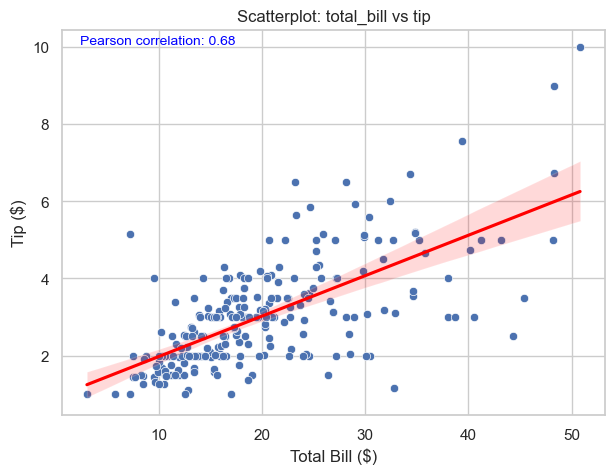

In [37]:
#|# =========================
#Escojamos 2 columnas numéricas de tips para mostrar su correlación
#|# =========================

pearson_corr = tips["total_bill"].corr(tips["tip"]) # Calcular correlación de Pearson


plt.figure(figsize=(7, 5)) #Tamaño de la figura
sns.scatterplot(data=tips, x="total_bill", y="tip") #Scatter plot
sns.regplot(data=tips, x="total_bill", y="tip", scatter=False, color="red") # línea de tendencia
plt.title("Scatterplot: total_bill vs tip") #Título del gráfico
plt.xlabel("Total Bill ($)") #Etiqueta del eje x
plt.ylabel("Tip ($)") #Etiqueta del eje y
plt.figtext(0.15, 0.85, f'Pearson correlation: {pearson_corr:.2f}', fontsize=10, color='blue') # Añadir texto a la figura
plt.show() #Mostrar el gráfico

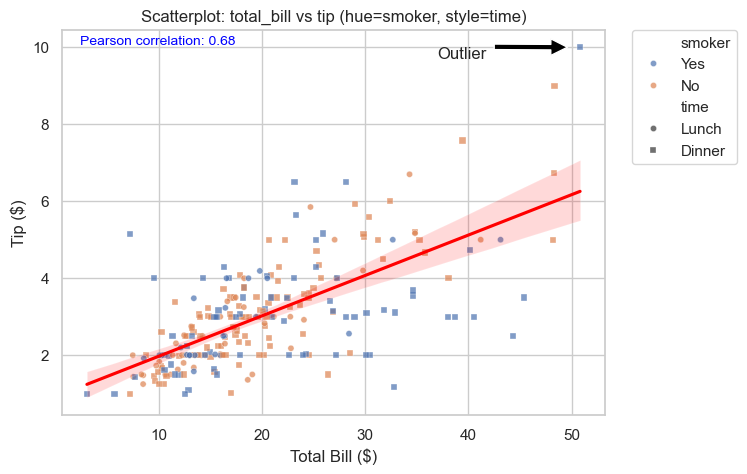

In [ ]:
# Mas personalizaciones



plt.figure(figsize=(7, 5))
sns.scatterplot(data=tips,
                x="total_bill", 
                y="tip", 
                hue="smoker", 
                style="time",
                markers=["o", "s"],
                alpha=0.7,
                s=20)
sns.regplot(data=tips, x="total_bill", y="tip", scatter=False, color="red")
plt.title("Scatterplot: total_bill vs tip (hue=smoker, style=time)")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
ax= plt.gca()
ax.annotate('Outlier', # Añadir anotación
            xy=(50, 10), # Coordenadas del punto a anotar
            xytext=(37, 9.7), # Coordenadas del texto
            arrowprops=dict(facecolor='black', shrink=0.05)) # Flecha

pearson_corr = tips["total_bill"].corr(tips["tip"]) # Calcular correlación de Pearson

plt.figtext(0.15, 0.85, f'Pearson correlation: {pearson_corr:.2f}', fontsize=10, color='blue') # Añadir texto

#Leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


plt.show()

## La paradoja de Simpson

La paradoja de Simpson pasa cuando una tendencia que ves en cada grupo por separado se invierte (o desaparece) cuando combinas los grupos en un solo análisis.

![](https://www.yizinet.com/wp-content/uploads/2022/07/Grafica-de-una-paradoja-de-Simpson-1024x461.png)

Pearson correlation: 0.60


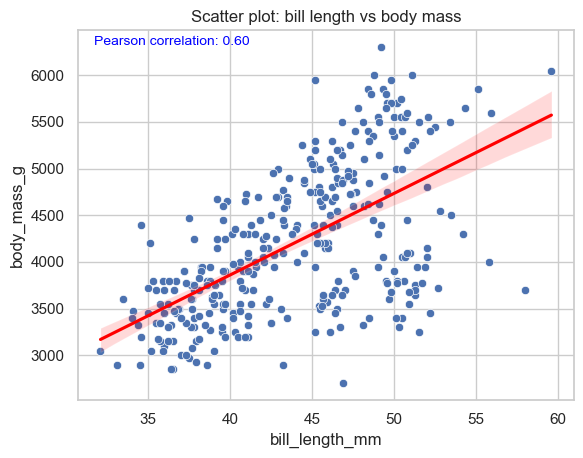

In [52]:
#|# =========================
#Escojamos 2 columnas numéricas de penguins para mostrar su correlación
#|# =========================

corr = penguins["bill_length_mm"].corr(penguins["body_mass_g"])
print(f"Pearson correlation: {corr:.2f}")

plt.figtext(0.15, 0.85, f'Pearson correlation: {corr:.2f}', fontsize=10, color='blue') # Añadir texto a la figura
sns.scatterplot(data=penguins, x="bill_length_mm", y="body_mass_g")
sns.regplot(data=penguins, x="bill_length_mm", y="body_mass_g", scatter=False, color="red")
plt.title("Scatter plot: bill length vs body mass")
plt.show()


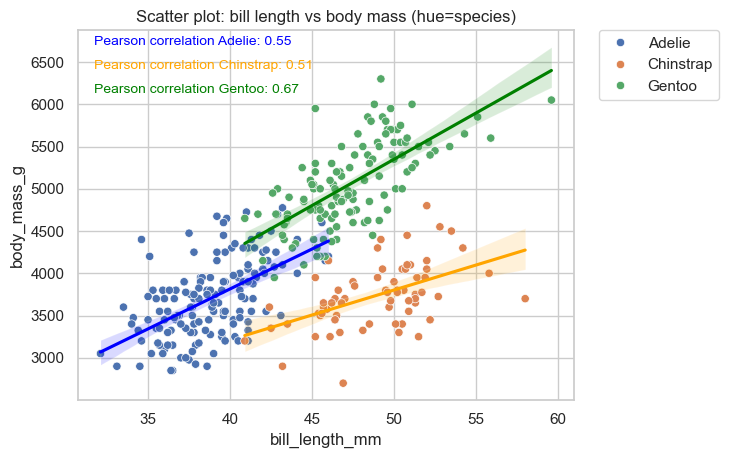

In [48]:
# Que pasa si añadimos hue por especie?

sns.scatterplot(data=penguins, x="bill_length_mm", y="body_mass_g", hue="species")
plt.title("Scatter plot: bill length vs body mass (hue=species)")

#Agregar coeficiente de correlación por especie
pearson_corr_adelie = penguins[penguins["species"]=="Adelie"]["bill_length_mm"].corr(penguins[penguins["species"]=="Adelie"]["body_mass_g"])
pearson_corr_chinstrap = penguins[penguins["species"]=="Chinstrap"]["bill_length_mm"].corr(penguins[penguins["species"]=="Chinstrap"]["body_mass_g"])
pearson_corr_gentoo = penguins[penguins["species"]=="Gentoo"]["bill_length_mm"].corr(penguins[penguins["species"]=="Gentoo"]["body_mass_g"])

#Agregar anotaciones de correlación

plt.figtext(0.15, 0.85, f'Pearson correlation Adelie: {pearson_corr_adelie:.2f}', fontsize=10, color='blue')
plt.figtext(0.15, 0.80, f'Pearson correlation Chinstrap: {pearson_corr_chinstrap:.2f}', fontsize=10, color='orange')
plt.figtext(0.15, 0.75, f'Pearson correlation Gentoo: {pearson_corr_gentoo:.2f}', fontsize=10, color='green')   


#Lineas de tendencia por especie
sns.regplot(data=penguins[penguins["species"]=="Adelie"], x="bill_length_mm", y="body_mass_g", scatter=False, color="blue")
sns.regplot(data=penguins[penguins["species"]=="Chinstrap"], x="bill_length_mm", y="body_mass_g", scatter=False, color="orange")
sns.regplot(data=penguins[penguins["species"]=="Gentoo"], x="bill_length_mm", y="body_mass_g", scatter=False, color="green")

#Leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()


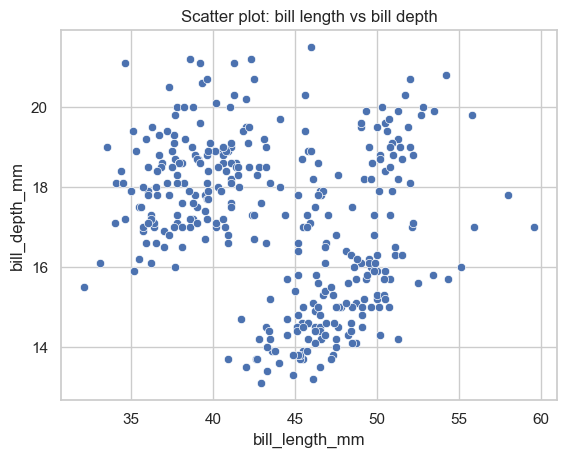

In [49]:
#Agreguemos hue por especie a este grafico utilizando el ejemplo anterior

sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
plt.title("Scatter plot: bill length vs bill depth")
plt.show()

### Estudiemos las correlaciones de muchas variables a la vez

In [53]:
# =========================
# 2) Selección de columnas numéricas (clave para correlaciones)
# =========================
penguins_num = penguins.select_dtypes(include="number")

print("penguins num cols:", list(penguins_num.columns))


penguins num cols: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


In [54]:
# =========================
# 3) Correlación numérica vs numérica
# =========================
# Pearson (lineal)
corr_penguins = penguins_num.corr(method="pearson")

display(corr_penguins)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


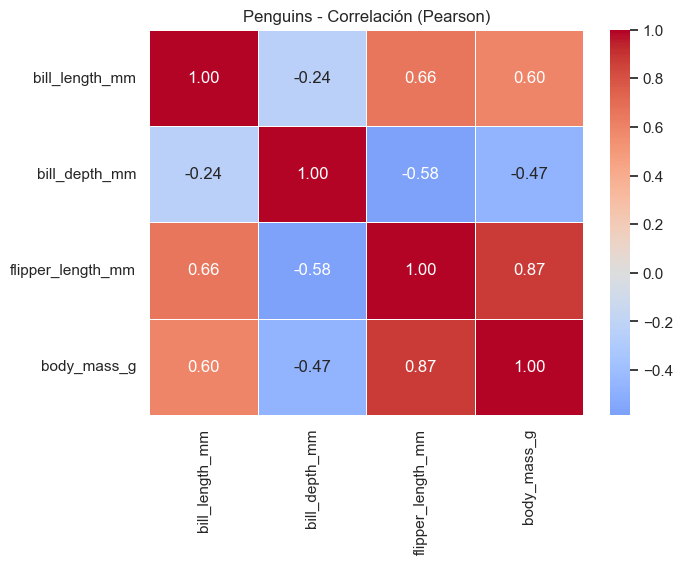

In [55]:
# =========================
# 4) Heatmap básico de correlación
# =========================
plt.figure(figsize=(7, 5))
sns.heatmap(
    corr_penguins,
    annot=True,        # muestra los valores
    fmt=".2f",         # formato
    cmap="coolwarm",   # paleta
    center=0,          # centra el color en 0
    linewidths=0.5
)
plt.title("Penguins - Correlación (Pearson)")
plt.show()


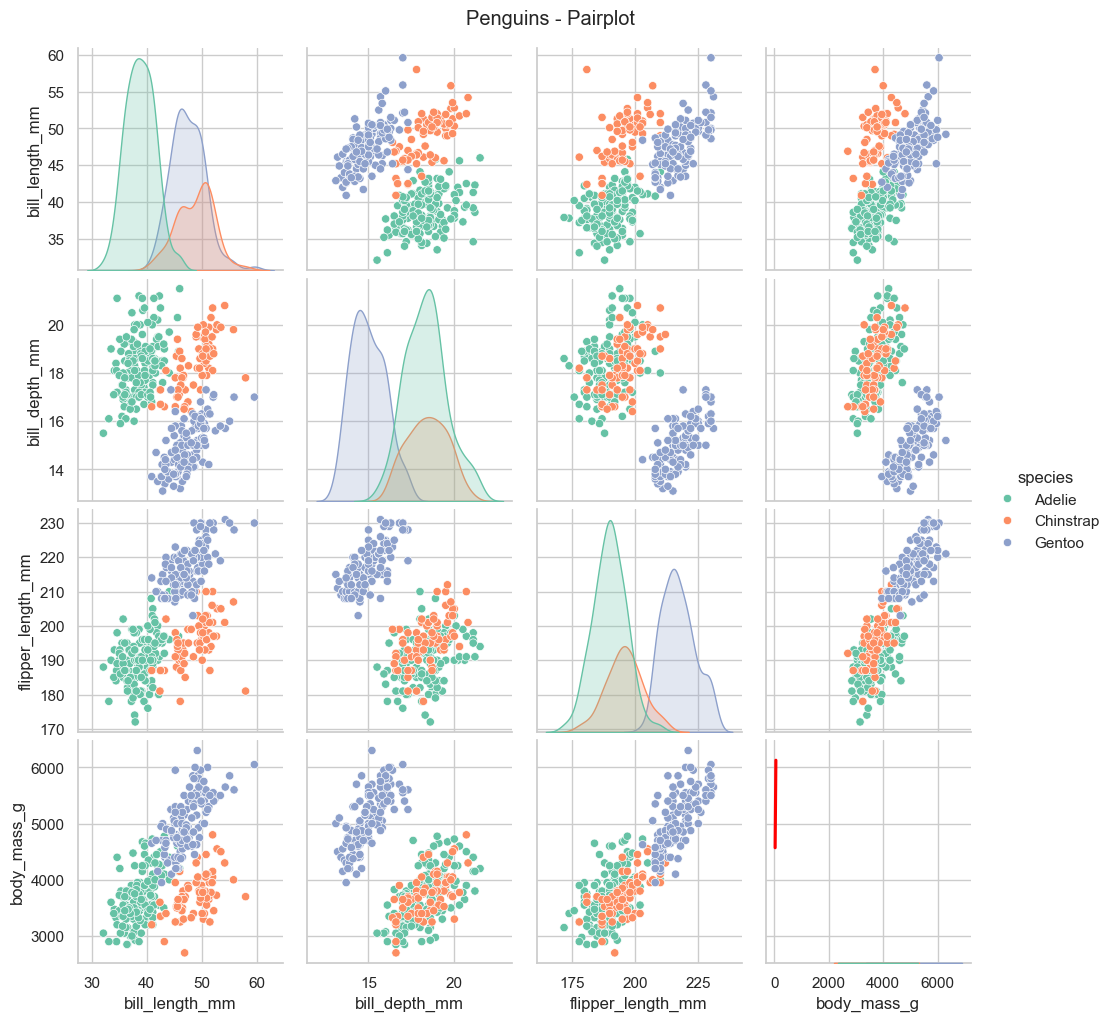

In [ ]:
# Pairplot (scatterplot + distribución)
sns.pairplot(penguins, diag_kind="kde", hue="species", palette="Set2"}) # tipo de gráfico en la diagonal
plt.suptitle("Penguins - Pairplot", y=1.02)
plt.show()

### Ahora tú!

In [ ]:
# Ahora realiza el mismo heatmap y pairplot para titanic y tips (con su respectiva correlación)

## ¿Qué aprendimos hoy?

---

Hoy construimos la base para **analizar correlaciones con criterio**:

1. **Qué es correlación y qué no es**
   - Correlación mide **asociación**, no “culpa”.
   - Vimos dirección (**positiva/negativa**) y fuerza (**|r|**).
   - Interpretamos el coeficiente y entendimos por qué `r≈0` no significa “no hay relación” (puede ser no lineal).

2. **Correlación vs causalidad**
   - Identificamos el rol de las **variables de confusión**.
   - Entendimos por qué “se mueven juntos” ≠ “uno causa al otro”.

3. **Correlaciones entre variables numéricas**
   - Calculamos correlaciones con `pandas` (`.corr()`).
   - Visualizamos patrones e interpretamos

4. **Visualización para estudiar correlaciones**
   - **Scatter plots (Seaborn)**:
     - `scatterplot` y `regplot` para línea de tendencia
     - personalización: títulos, labels, leyendas, `hue`, `style`, `alpha`, etc.
   - **Heatmaps**:
     - `annot`, `fmt`, `center`, `vmin/vmax`

   - **Pairplot**
     - `seaborn.pairplot` con `hue`
     - selección de columnas numéricas antes de graficar

5. **Paradoja de Simpson (introducción)**
   - Entendimos que una relación puede **cambiar o invertirse** al agrupar datos.
   - Vimos por qué segmentar es obligatorio cuando hay una variable que “mezcla” grupos.

---

## ⏭️ Próxima semana

La próxima semana vamos a profundizar y practicar más fino:

1. **Pearson vs Spearman**

2. **Correlaciones entre distintos tipos de variables**
   - Numérica vs Numérica
   - Categórica vs Categórica (asociación)
   - Numérica vs Categórica (según cantidad de categorías)
   - Elegir la métrica correcta según el tipo de dato

4. **Automatización**
   - Vamos a construir funciones que:
     - seleccionen variables por tipo automáticamente
     - calculen correlaciones/medidas de asociación según corresponda
     - generen reportes rápidos (tablas + heatmaps)
     - sugieran segmentaciones posibles para revisar Simpson

---

